## Importing Libraries

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pdS
import seaborn as sns

## Data Preprocessing

### Training Image Preprocessing

In [2]:
trianing_set= tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
   
)

Found 27948 files belonging to 15 classes.


### Validation Image Preprocessing

In [ ]:
validation_set= tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
   
)

Found 6986 files belonging to 15 classes.


In [4]:
trianing_set

<BatchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 15), dtype=tf.float32, name=None))>

In [ ]:
for x,y in trianing_set:
    print(x,x.shape)
    print(y,y.shape)
    break

tf.Tensor(
[[[[  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   ...
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]]

  [[  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   ...
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]]

  [[  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   ...
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]]

  ...

  [[  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   ...
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]]

  [[  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   ...
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]]

  [[  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   ...
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     

### To avoid Overshooting
1. Choose small learning rate default 0.001 we are taking 0.0001
2. There may be a chance of underfitting, so increase number of neuron
3. Add more convulation layer to extract more feature from images there may be posssibility  that model unable to capture relevent feature or model is confusing due to lack of features so feed with more features
   

## Building Model

In [1]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
from tensorflow.keras.models import Sequential

In [7]:
model=Sequential()

In [8]:
## Building Convulation layer

In [9]:
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [10]:
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [11]:
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [12]:
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [13]:
model.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [14]:
model.add(Dropout(0.25))  #To avoid overfitting

In [15]:
model.add(Flatten())

In [16]:
model.add(Dense(units=1200,activation='relu'))

In [17]:
model.add(Dropout(0.4))

In [18]:
#Output Layer
model.add(Dense(units=15,activation='softmax'))

### Compiling Model

In [19]:
model.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                    

In [21]:
training_history = model.fit(x=trianing_set,validation_data=validation_set,epochs=10)

Epoch 1/10
874/874 [==============================] - 2091s 2s/step - loss: 1.3354 - accuracy: 0.5588 - val_loss: 0.7093 - val_accuracy: 0.7548
Epoch 2/10
874/874 [==============================] - 2016s 2s/step - loss: 0.5540 - accuracy: 0.8157 - val_loss: 0.5333 - val_accuracy: 0.8202
Epoch 3/10
874/874 [==============================] - 1932s 2s/step - loss: 0.3392 - accuracy: 0.8869 - val_loss: 0.2962 - val_accuracy: 0.8958
Epoch 4/10
874/874 [==============================] - 1930s 2s/step - loss: 0.2431 - accuracy: 0.9179 - val_loss: 0.3385 - val_accuracy: 0.8853
Epoch 5/10
874/874 [==============================] - 1882s 2s/step - loss: 0.1830 - accuracy: 0.9395 - val_loss: 0.2811 - val_accuracy: 0.9087
Epoch 6/10
874/874 [==============================] - 1926s 2s/step - loss: 0.1398 - accuracy: 0.9508 - val_loss: 0.2099 - val_accuracy: 0.9347
Epoch 7/10
874/874 [==============================] - 1776s 2s/step - loss: 0.1181 - accuracy: 0.9596 - val_loss: 0.1426 - val_accuracy:

### Model Evaluation

In [22]:
#Model Evaluation on training set
train_loss,train_acc=model.evaluate(trianing_set)

874/874 [==============================] - 446s 509ms/step - loss: 0.0212 - accuracy: 0.9931


In [23]:
print(train_loss,train_acc)

0.02116265706717968 0.9930585622787476


In [24]:
#Model on validation set
val_loss,val_acc=model.evaluate(validation_set)

219/219 [==============================] - 110s 497ms/step - loss: 0.1458 - accuracy: 0.9581


In [25]:
print(val_loss,val_acc)

0.14576387405395508 0.9580589532852173


### Saving Model

In [48]:
model.save("trained_model.keras")

In [27]:
training_history.history

{'loss': [1.3354405164718628,
  0.5539596676826477,
  0.3391551077365875,
  0.24309034645557404,
  0.18300700187683105,
  0.1397978514432907,
  0.11813022196292877,
  0.09721359610557556,
  0.08828312903642654,
  0.0731750875711441],
 'accuracy': [0.5587519407272339,
  0.8157292008399963,
  0.886897087097168,
  0.9179189801216125,
  0.939494788646698,
  0.950837254524231,
  0.9596035480499268,
  0.9682624936103821,
  0.9700872898101807,
  0.9760627150535583],
 'val_loss': [0.7093144059181213,
  0.5333146452903748,
  0.29621422290802,
  0.3385280966758728,
  0.28109052777290344,
  0.20994774997234344,
  0.1426239162683487,
  0.16003090143203735,
  0.21495363116264343,
  0.14576387405395508],
 'val_accuracy': [0.7547953128814697,
  0.8202118277549744,
  0.8957915902137756,
  0.8853421211242676,
  0.9086744785308838,
  0.9347265958786011,
  0.9543372392654419,
  0.9478957653045654,
  0.9342971444129944,
  0.9580589532852173]}

In [28]:
#Recording History in json
import json
with open("training_his.json","w") as f:
    json.dump(training_history.history,f)

In [29]:
training_history.history['val_accuracy']

[0.7547953128814697,
 0.8202118277549744,
 0.8957915902137756,
 0.8853421211242676,
 0.9086744785308838,
 0.9347265958786011,
 0.9543372392654419,
 0.9478957653045654,
 0.9342971444129944,
 0.9580589532852173]

### Accuracy Visualization

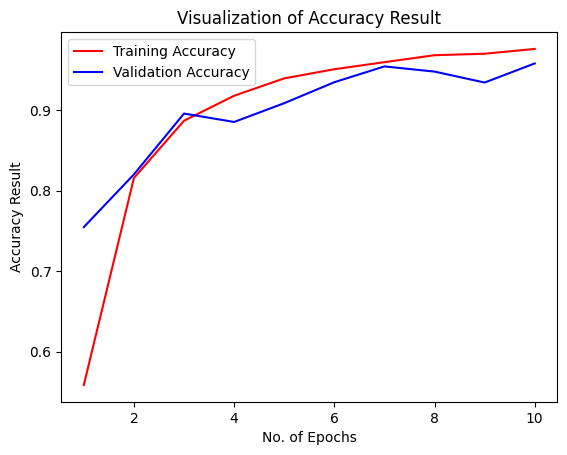

In [32]:
import matplotlib.pyplot as plt

epochs = [i for i in range(1,11)]
plt.plot(epochs, training_history.history['accuracy'], color='red', label='Training Accuracy')
plt.plot(epochs, training_history.history['val_accuracy'], color='blue', label='Validation Accuracy')
plt.xlabel("No. of Epochs")
plt.ylabel("Accuracy Result")
plt.title("Visualization of Accuracy Result")
plt.legend()
plt.show()


### Some Other metrics for model evaluation

In [33]:
class_name=validation_set.class_names
class_name

['Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___healthy']

In [34]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
   
)

Found 6986 files belonging to 15 classes.


In [35]:
y_pred = model.predict(test_set)
y_pred,y_pred.shape

219/219 [==============================] - 104s 475ms/step


(array([[9.9935466e-01, 8.7388151e-05, 2.0253931e-06, ..., 6.3892469e-09,
         5.4910290e-09, 1.7119985e-08],
        [1.0000000e+00, 1.8848171e-08, 4.5334257e-16, ..., 3.5937470e-12,
         4.1047975e-20, 8.0594032e-19],
        [1.0000000e+00, 9.3401571e-12, 6.9781692e-16, ..., 1.9948585e-18,
         1.5702774e-22, 1.9492247e-21],
        ...,
        [1.0160107e-10, 1.3579230e-08, 5.6748375e-09, ..., 3.8576551e-09,
         3.3893954e-09, 9.9970704e-01],
        [7.5421863e-13, 1.5044514e-10, 4.5649141e-11, ..., 3.6431205e-11,
         1.0010592e-10, 9.9999940e-01],
        [1.5369288e-16, 6.6351362e-16, 1.2604979e-14, ..., 3.4766009e-16,
         1.0467519e-16, 1.0000000e+00]], dtype=float32),
 (6986, 15))

In [36]:
predicted_categories=tf.argmax(y_pred,axis=1)

In [37]:
predicted_categories

<tf.Tensor: shape=(6986,), dtype=int64, numpy=array([ 0,  0,  0, ..., 14, 14, 14], dtype=int64)>

In [39]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
true_categories


<tf.Tensor: shape=(6986, 15), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [40]:
Y_true=tf.argmax(true_categories,axis=1)
Y_true

<tf.Tensor: shape=(6986,), dtype=int64, numpy=array([ 0,  0,  0, ..., 14, 14, 14], dtype=int64)>

In [42]:
from sklearn.metrics import classification_report


In [43]:
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                               precision    recall  f1-score   support

                Pepper,_bell___Bacterial_spot       0.98      0.95      0.97       478
                       Pepper,_bell___healthy       0.97      0.98      0.98       497
                        Potato___Early_blight       0.97      1.00      0.98       485
                         Potato___Late_blight       0.98      0.95      0.96       485
                             Potato___healthy       0.99      0.97      0.98       456
                      Tomato___Bacterial_spot       0.97      0.98      0.97       425
                        Tomato___Early_blight       0.90      0.94      0.92       480
                         Tomato___Late_blight       0.95      0.92      0.93       463
                           Tomato___Leaf_Mold       0.95      0.99      0.97       470
                  Tomato___Septoria_leaf_spot       0.96      0.85      0.90       436
Tomato___Spider_mites Two-spotted_spider_m

In [45]:
from sklearn.metrics import confusion_matrix

# Assume Y_true and predicted_categories are your true labels and predicted labels respectively
cm = confusion_matrix(Y_true, predicted_categories)
cm_shape = cm.shape
cm_shape


(15, 15)

### Confusion Maatrix Visualization

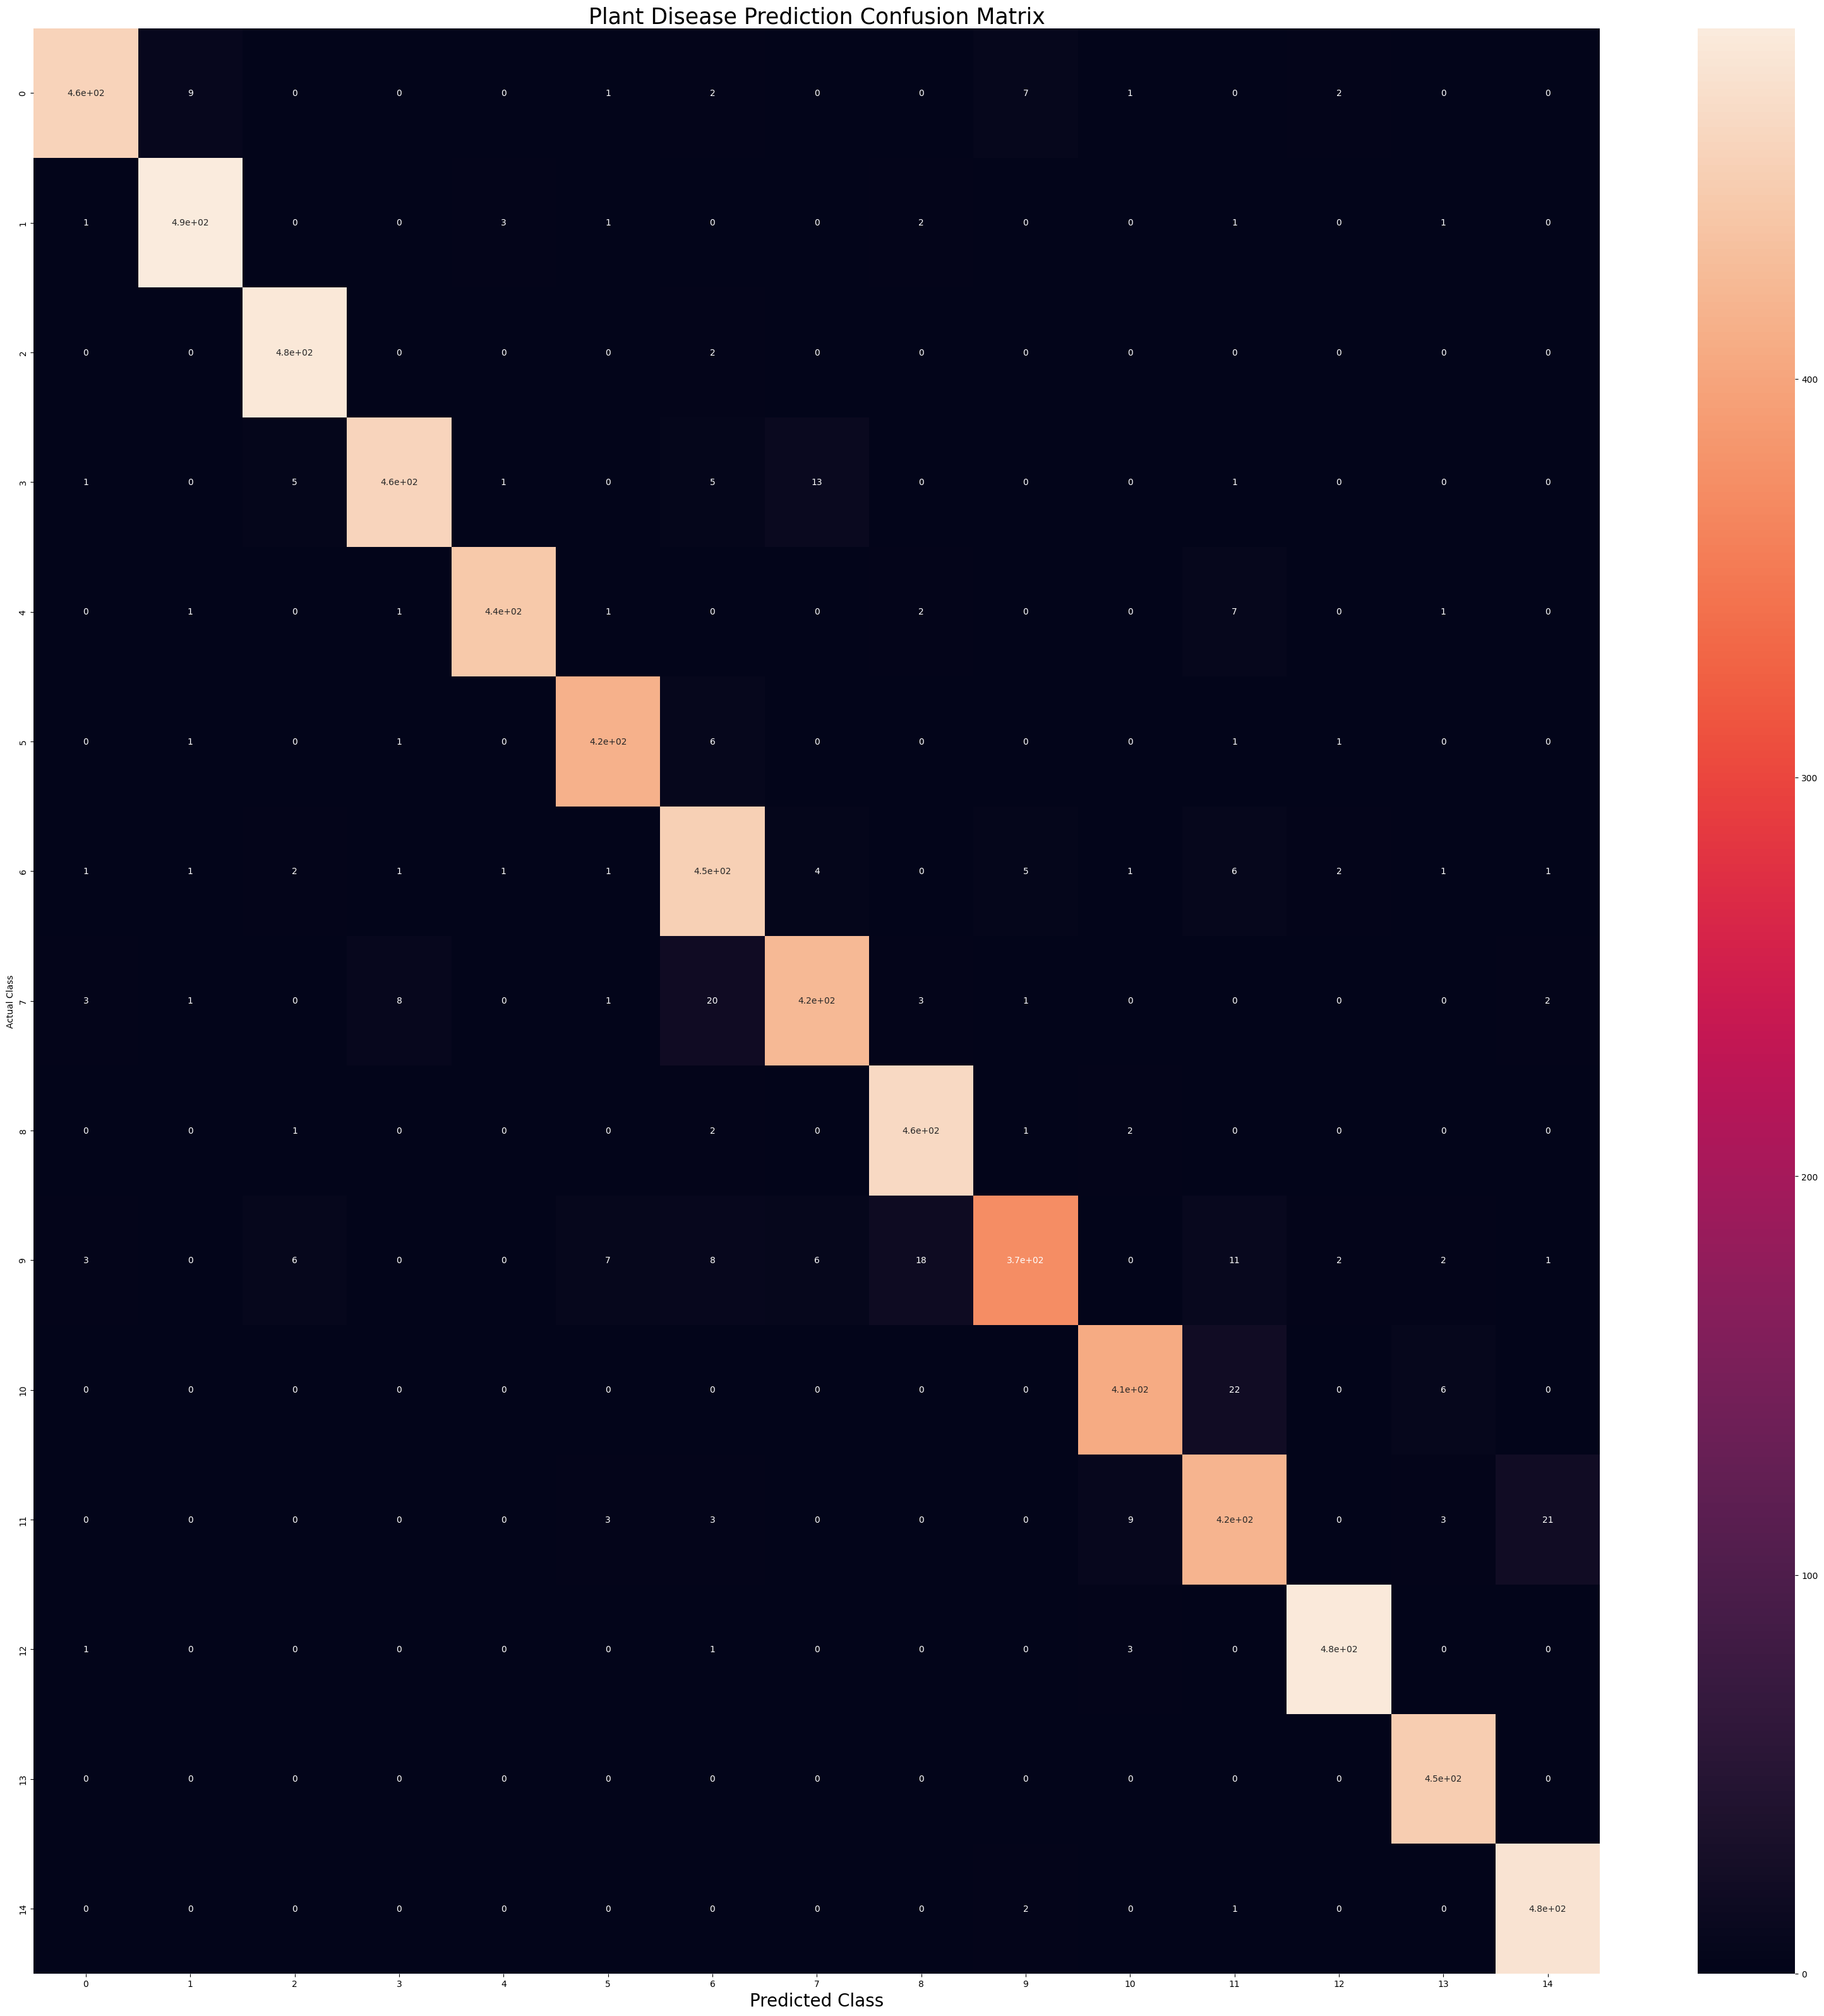

In [46]:
plt.figure(figsize=(40,40))
sns.heatmap(cm,annot=True)
plt.xlabel("Predicted Class",fontsize=20)
plt.ylabel("Actual Class")
plt.title("Plant Disease Prediction Confusion Matrix",fontsize=25)
plt.show()